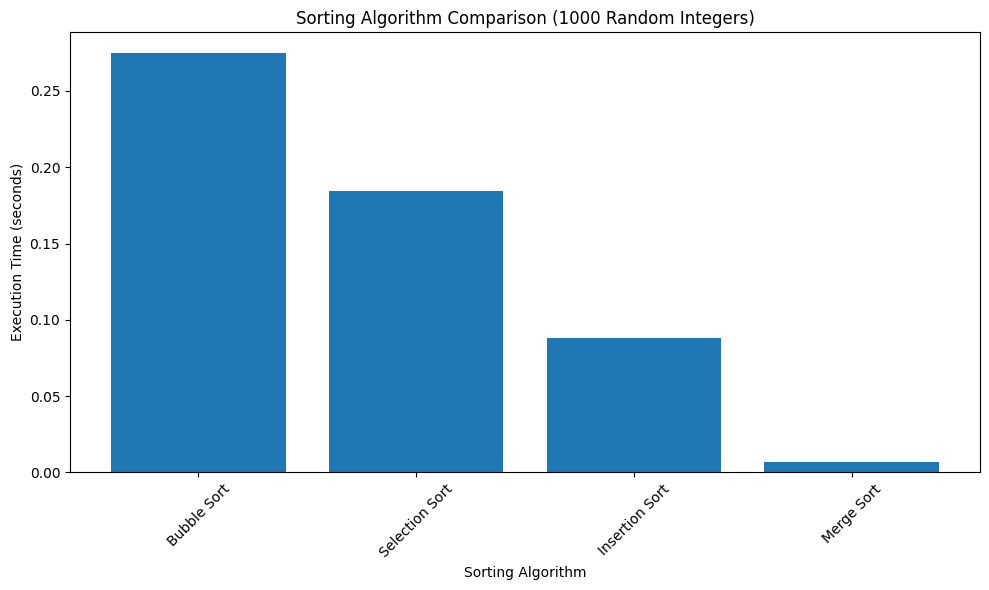

In [1]:
import random
import time
import matplotlib.pyplot as plt

# Generate 1000 random integers between 1 and 10000
data = [random.randint(1, 10000) for _ in range(1000)]

def bubble_sort(data):
  """Sorts a list of integers in ascending order using bubble sort."""
  n = len(data)
  for i in range(n - 1):
    for j in range(0, n - i - 1):
      if data[j] > data[j + 1]:
        data[j], data[j + 1] = data[j + 1], data[j]

def selection_sort(data):
  """Sorts a list of integers in ascending order using selection sort."""
  n = len(data)
  for i in range(n):
    min_index = i
    for j in range(i + 1, n):
      if data[j] < data[min_index]:
        min_index = j
    data[i], data[min_index] = data[min_index], data[i]

def insertion_sort(data):
  """Sorts a list of integers in ascending order using insertion sort."""
  n = len(data)
  for i in range(1, n):
    key = data[i]
    j = i - 1
    while j >= 0 and key < data[j]:
      data[j + 1] = data[j]
      j -= 1
    data[j + 1] = key

def merge_sort(data):
  """Sorts a list of integers in ascending order using merge sort."""
  if len(data) <= 1:
    return data
  mid = len(data) // 2
  left = merge_sort(data[:mid])
  right = merge_sort(data[mid:])
  return merge(left, right)

def merge(left, right):
  """Merges two sorted lists into a single sorted list."""
  merged = []
  i = 0
  j = 0
  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      merged.append(left[i])
      i += 1
    else:
      merged.append(right[j])
      j += 1
  merged += left[i:]
  merged += right[j:]
  return merged

# Measure execution time for each sorting algorithm
sorting_algorithms = [
    ("Bubble Sort", bubble_sort),
    ("Selection Sort", selection_sort),
    ("Insertion Sort", insertion_sort),
    ("Merge Sort", merge_sort),
]
sorting_times = []
for name, sort_func in sorting_algorithms:
  start_time = time.time()
  data_copy = data.copy()  # Avoid modifying the original data
  sort_func(data_copy)
  end_time = time.time()
  sorting_times.append((name, end_time - start_time))

# Plot the execution times
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in sorting_times], [time for _, time in sorting_times])
plt.xlabel("Sorting Algorithm")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Comparison (1000 Random Integers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

question 2

In [4]:
def print_sorted_arrays(arrays):
    # Merge all arrays into a single list
    merged = []
    for arr in arrays:
        merged.extend(arr)

    # Bubble sort to sort the merged list
    n = len(merged)
    for i in range(n):
        for j in range(0, n-i-1):
            if merged[j] > merged[j+1]:
                merged[j], merged[j+1] = merged[j+1], merged[j]

    # Print the sorted elements
    for num in merged:
        print(num, end=' ')

# Example usage
m = 3  # Number of unsorted arrays
n = 4  # Number of elements in each array

# Generating example unsorted arrays
unsorted_arrays = []
for i in range(m):
    unsorted_arrays.append([i * n + j for j in range(1, n + 1)])

# Printing the unsorted arrays
print("Unsorted Arrays:")
for arr in unsorted_arrays:
    print(arr)

# Printing the arrays in sorted order
print("\nArrays in Sorted Order:")
print_sorted_arrays(unsorted_arrays)



Unsorted Arrays:
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]

Arrays in Sorted Order:
1 2 3 4 5 6 7 8 9 10 11 12 

question 3

In [9]:
def find_k_largest(arr, k):
    # Create a min-heap
    min_heap = []

    # Traverse the array
    for num in arr:
        # If heap is not full, push the element
        if len(min_heap) < k:
            heapq.heappush(min_heap, num)
        else:
            # If the current element is larger than the smallest element in the heap
            if num > min_heap[0]:
                # Replace the smallest element with the current element
                heapq.heappop(min_heap)
                heapq.heappush(min_heap, num)

    # The min-heap now contains the K largest elements
    return min_heap

# Example usage:
arr = [3, 1, 5, 12, 2, 11]
k = 3
result = find_k_largest(arr, k)
print("The", k, "largest elements are:", result)

class MinHeap:
    def __init__(self, max_size):
        self.max_size = max_size
        self.size = 0
        self.heap = [None] * (max_size + 1)

    def parent(self, i):
        return (i - 1) // 2

    def left_child(self, i):
        return 2 * i + 1

    def right_child(self, i):
        return 2 * i + 2

    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    def insert(self, value):
        if self.size == self.max_size:
            if value > self.heap[0]:
                self.heap[0] = value
                self.min_heapify(0)
        else:
            self.heap[self.size] = value
            self.size += 1
            self.heapify_up(self.size - 1)

    def heapify_up(self, i):
        while i != 0 and self.heap[self.parent(i)] > self.heap[i]:
            self.swap(i, self.parent(i))
            i = self.parent(i)

    def min_heapify(self, i):
        l = self.left_child(i)
        r = self.right_child(i)
        smallest = i

        if l < self.size and self.heap[l] < self.heap[i]:
            smallest = l
        if r < self.size and self.heap[r] < self.heap[smallest]:
            smallest = r

        if smallest != i:
            self.swap(i, smallest)
            self.min_heapify(smallest)

    def get_min(self):
        return self.heap[0]

    def get_heap(self):
        return self.heap


def find_k_largest(arr, k):
    # Create a min-heap of size K
    min_heap = MinHeap(k)

    # Insert first K elements
    for i in range(k):
        min_heap.insert(arr[i])

    # Iterate through the remaining elements
    for i in range(k, len(arr)):
        if arr[i] > min_heap.get_min():
            min_heap.insert(arr[i])

    return min_heap.get_heap()[:k]


# Example usage:
arr = [3, 1, 5, 12, 2, 11]
k = 3
result = find_k_largest(arr, k)
print("The", k, "largest elements are:", result)


The 3 largest elements are: [5, 12, 11]
The 3 largest elements are: [5, 12, 11]


question 4

In [11]:
def activity_selection(activities):


    # Sort activities by their finishing time
    activities.sort(key=lambda x: x[1])

    selected_activities = []
    current_end_time = -float('inf')  # Initialize with negative infinity

    for start, end in activities:
        if start >= current_end_time:
            selected_activities.append((start, end))
            current_end_time = end

    return selected_activities, len(selected_activities)

# Sample activities
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

selected_activities, max_activities = activity_selection(activities)

print("Selected activities:", selected_activities)
print("Maximum number of activities:",max_activities)

Selected activities: [(1, 4), (5, 7), (8, 11), (12, 14)]
Maximum number of activities: 4


question 5

In [12]:
def merge_intervals(intervals):

  intervals.sort(key=lambda x: x[0])  # Sort intervals by start time

  merged_intervals = []
  current_interval = intervals[0]
  for start, end in intervals[1:]:
    if start <= current_interval[1]:  # Overlap exists
      current_interval = (current_interval[0], max(current_interval[1], end))
    else:  # No overlap
      merged_intervals.append(current_interval)
      current_interval = (start, end)

  merged_intervals.append(current_interval) # Add the last interval
  return merged_intervals

# Corrected sample intervals (assuming the third interval was meant to be (2, 5))
intervals = [(1, 4), (2, 5), (17, 18), (6, 9)]

merged_intervals = merge_intervals(intervals)
print("Merged intervals:",merged_intervals)

Merged intervals: [(1, 5), (6, 9), (17, 18)]
